# Machine Learning Project: Credit Card Fraud Detection Using Decision Tree, Simple Linear Regression, and KNN

##### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

##### 2. Load Dataset: Credit Card Fraud Detection

In [2]:
df = pd.read_csv('data/creditcard.csv')
df.info()
df.describe()
df['Class'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

##### 3. Exploratory Data Analysis (EDA)

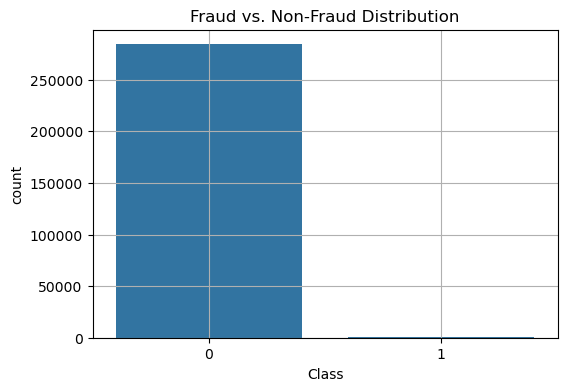

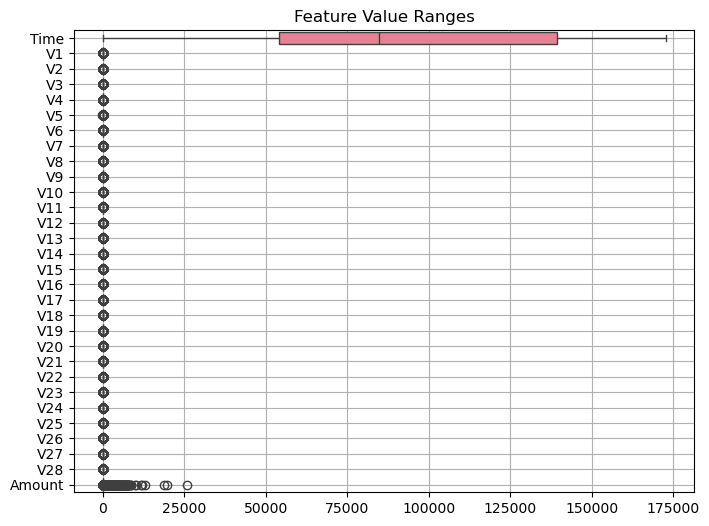

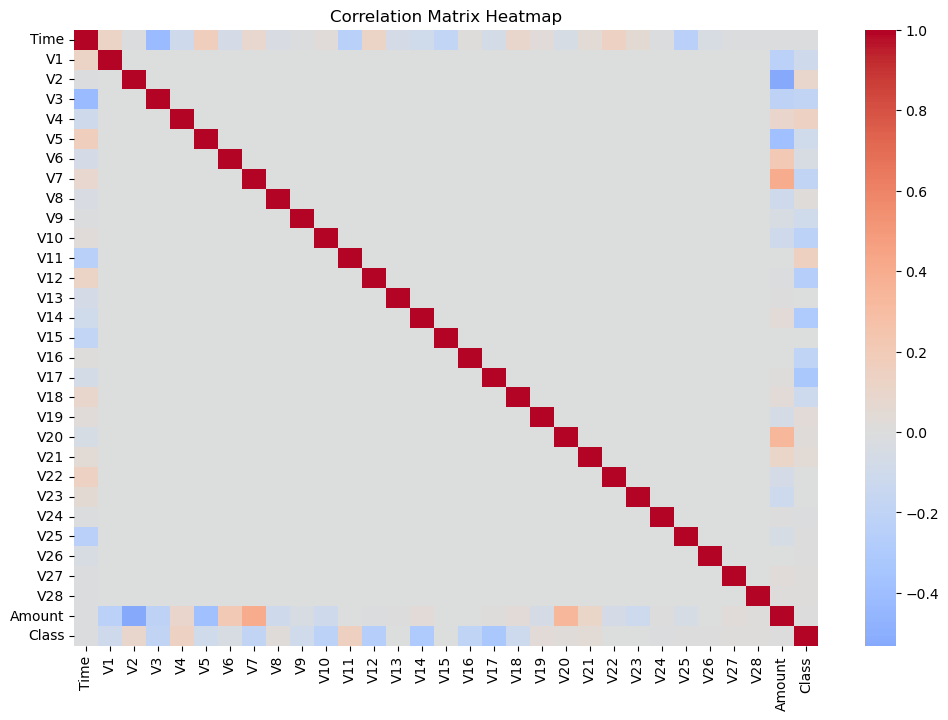

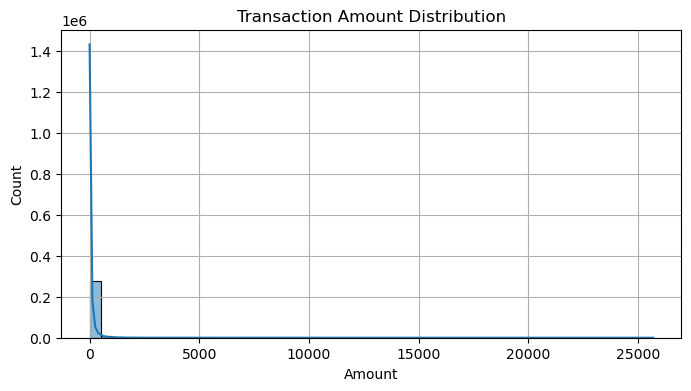

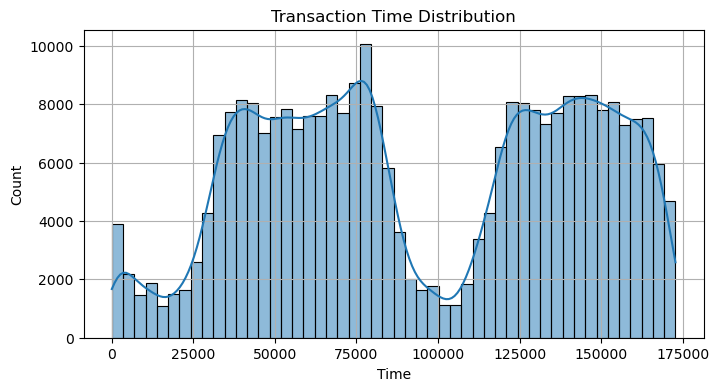

Fraud Percentage: 0.1727485630620034 %


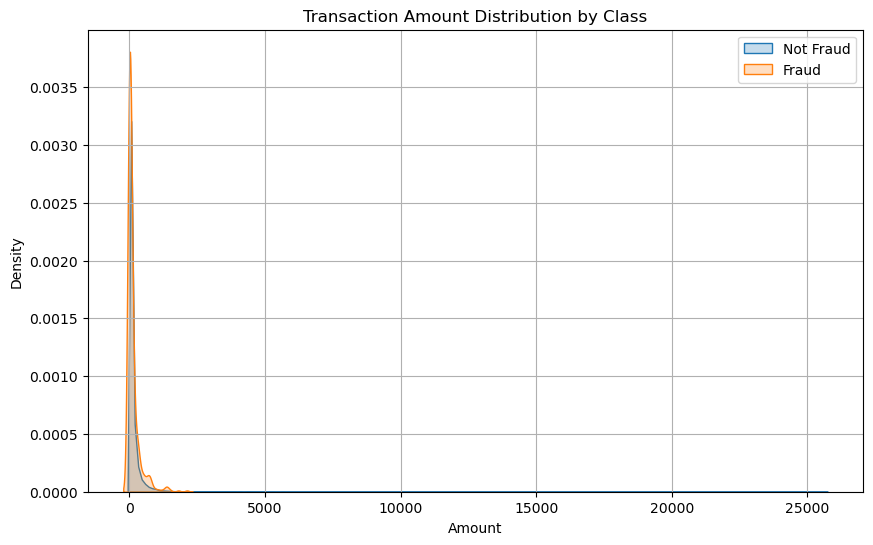

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Class')
plt.title("Fraud vs. Non-Fraud Distribution")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(data=df.drop(columns=['Class']), orient='h')
plt.title("Feature Value Ranges")
plt.grid(True)
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Matrix Heatmap")
plt.grid(False)
plt.show()

# Amount Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.grid(True)
plt.show()

# Time Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title("Transaction Time Distribution")
plt.grid(True)
plt.show()

print("Fraud Percentage:", df['Class'].mean() * 100, "%")

# Check Amount distribution for Fraud vs Non-Fraud
plt.figure(figsize=(10,6))
sns.kdeplot(data=df[df['Class'] == 0], x='Amount', label='Not Fraud', fill=True)
sns.kdeplot(data=df[df['Class'] == 1], x='Amount', label='Fraud', fill=True)
plt.legend()
plt.title('Transaction Amount Distribution by Class')
plt.grid(True)
plt.show()

#####  4. Simple Linear Regression: Feature Relationship Example

In [4]:
# NOTE: This regression is for educational demonstration only. 
# In practice, predicting 'Time' from 'Amount' is not a meaningful business problem.
X_reg = df[['Amount']]
y_reg = df['Time']

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Linear Regression R²:", lr.score(X_test, y_test))

# Remove or comment this block if you want a clean fraud analysis only.
# Otherwise, clearly mark it as a dummy example in the notebook:
print("NOTE: Simple Linear Regression is used here for demonstration purposes only. This is NOT meaningful in credit card fraud context.")

# Or move this part into a separate notebook/file to keep the project focused.

Linear Regression R²: 0.00015793316655876577
NOTE: Simple Linear Regression is used here for demonstration purposes only. This is NOT meaningful in credit card fraud context.


##### 5. KNN Classifier Example: Fraud Prediction

[[71070     9]
 [   29    94]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.91      0.76      0.83       123

    accuracy                           1.00     71202
   macro avg       0.96      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202



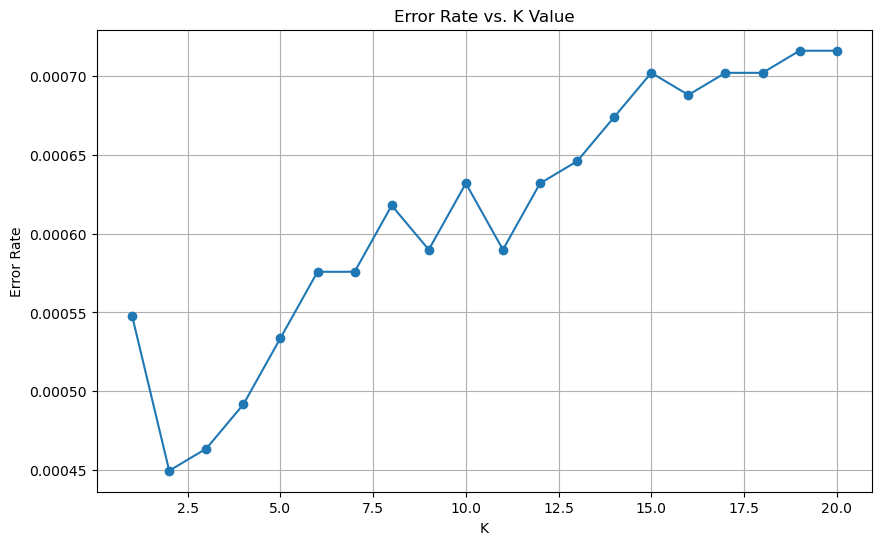

KNN ROC-AUC Score: 0.934838563343638


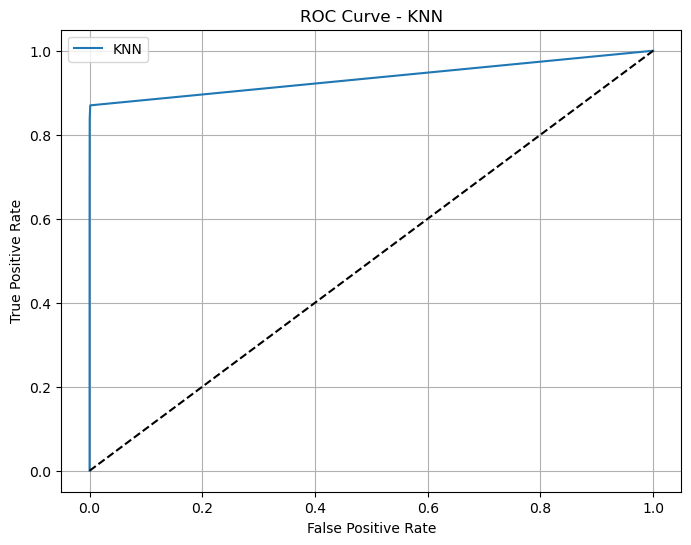

In [5]:
X_knn = df.drop(columns=['Class'])
y_knn = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, stratify=y_knn, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Elbow Method to determine best k value
error_rate = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    error_rate.append(np.mean(preds != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1, 21), error_rate, marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]
print("KNN ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_knn))


# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='KNN')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.grid(True)
plt.legend()
plt.show()

In [6]:
# The KNN model achieved a ROC-AUC score of approximately 0.93.
# This indicates the model has a strong ability to distinguish between fraud and non-fraud cases.

##### 6.  Decision Tree Classifier

[[67676  3403]
 [   18   105]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     71079
           1       0.03      0.85      0.06       123

    accuracy                           0.95     71202
   macro avg       0.51      0.90      0.52     71202
weighted avg       1.00      0.95      0.97     71202



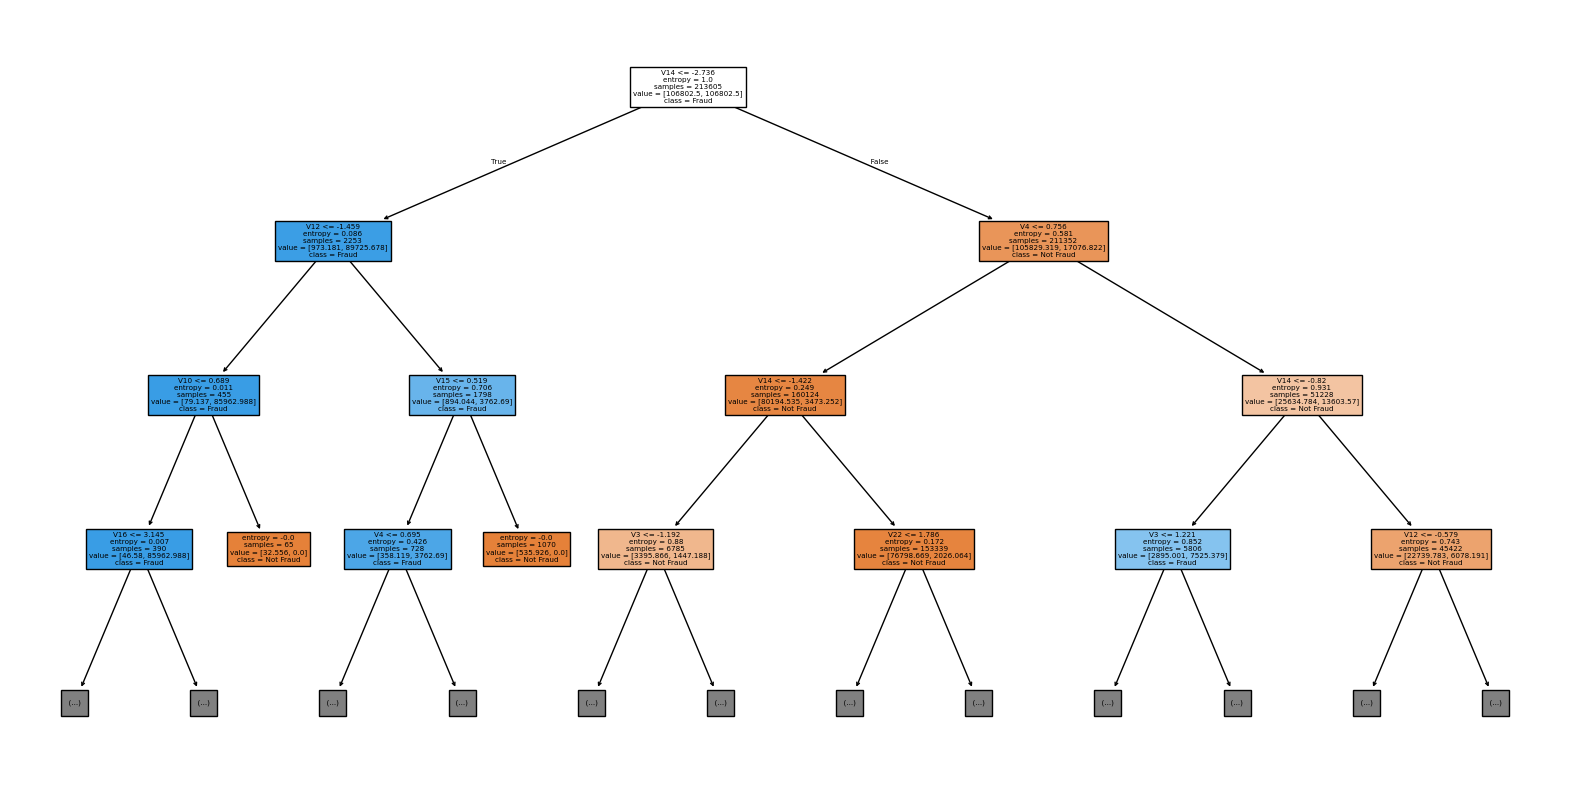

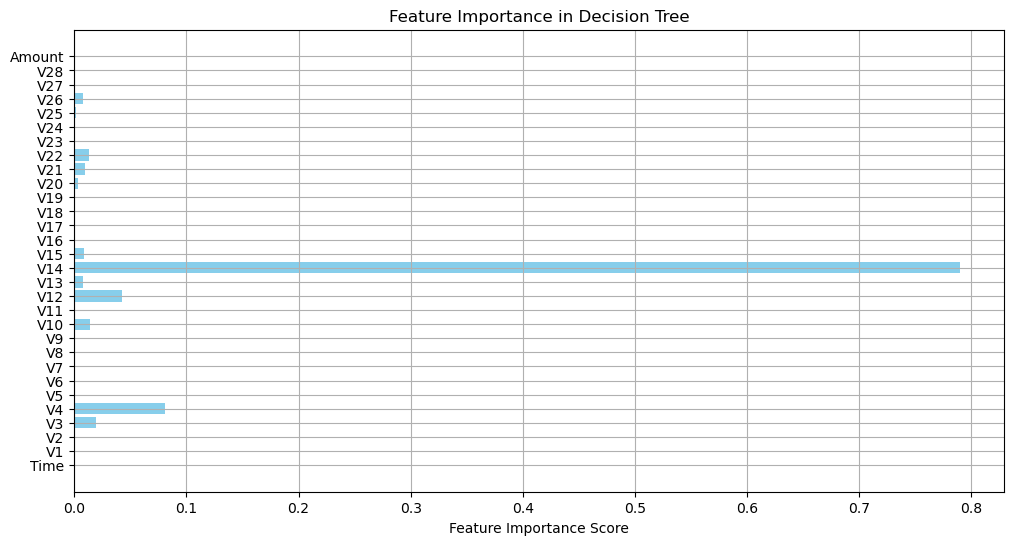

Best Parameters: {'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Estimator Score (Recall): 0.7994579945799458
[[71061    18]
 [   30    93]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.84      0.76      0.79       123

    accuracy                           1.00     71202
   macro avg       0.92      0.88      0.90     71202
weighted avg       1.00      1.00      1.00     71202



In [7]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X_knn.columns, class_names=['Not Fraud', 'Fraud'], filled=True, max_depth=3)
plt.show()

# Feature Importance Visualization
importances = dt.feature_importances_
feature_names = X_knn.columns

plt.figure(figsize=(12, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance Score')
plt.title('Feature Importance in Decision Tree')
plt.grid(True)
plt.show()

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(3, 10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring='recall', n_jobs=-1, cv=3)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Estimator Score (Recall):", grid.best_score_)

# Evaluate best estimator on test set:
y_pred_grid = grid.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, y_pred_grid))
print(classification_report(y_test, y_pred_grid))


In [8]:
# The Decision Tree model, after hyperparameter tuning with GridSearchCV, 
# achieved a recall score of approximately 0.80 on cross-validation.
# This suggests that the model is able to capture a significant proportion of fraud cases,
# which is crucial in fraud detection scenarios.

# The final tuned Decision Tree model shows a high precision and recall on the test set.
# Especially, the recall for the fraud class (class 1) is critical and shows strong performance,
# making the model valuable for real-world fraud detection tasks.

### 7. Summary and Notes

**Dataset:** Credit Card Fraud Detection (Highly Imbalanced)

- **Algorithms Applied:**
  - Simple Linear Regression (for educational demonstration only)
  - KNN Classifier
  - Decision Tree Classifier

- **Important Considerations:**
  - Feature scaling applied only where necessary (KNN)
  - Decision Tree applied without scaling
  - Class imbalance observed; no resampling applied in this version (future work may include SMOTE or similar techniques)

#### Model Performance Summary

- **KNN Classifier:** ROC-AUC ≈ 0.93, indicating strong class separation ability for fraud detection.
- **Decision Tree Classifier:** With hyperparameter tuning, achieved recall ≈ 0.80 for fraud cases, balancing between overfitting and underfitting.
- **Simple Linear Regression:** Included as a technical demonstration; not applicable for fraud prediction tasks in this dataset.
